Fred에서 끌어오기

[참고 사이트 : FRED](https://fred.stlouisfed.org/docs/api/fred/)

In [9]:
library(httr)
library(rvest)
library(lubridate)
library(stringr)
library(readr)
library(jsonlite)

In [10]:
#OPEN API를 이용한 FRED 자료 입수
#1개를 가져오는 SAMPLE
series_id <- "CPIAUCSL" #소비자 물가지수(SA)
api_key <- "6e866fceb4cbe64a36b95c7953f33c17"
file_type <-"json"

url = paste0("http://api.stlouisfed.org/fred/series/observations",
             "?series_id=",series_id,
             "&api_key=",api_key,
             "&file_type=",file_type)

raw.data <- readLines(url, warn = "F",encoding="UTF-8")
dat<- fromJSON(raw.data)
str(dat)

List of 13
 $ realtime_start   : chr "2021-06-26"
 $ realtime_end     : chr "2021-06-26"
 $ observation_start: chr "1600-01-01"
 $ observation_end  : chr "9999-12-31"
 $ units            : chr "lin"
 $ output_type      : int 1
 $ file_type        : chr "json"
 $ order_by         : chr "observation_date"
 $ sort_order       : chr "asc"
 $ count            : int 893
 $ offset           : int 0
 $ limit            : int 100000
 $ observations     :'data.frame':	893 obs. of  4 variables:
  ..$ realtime_start: chr [1:893] "2021-06-26" "2021-06-26" "2021-06-26" "2021-06-26" ...
  ..$ realtime_end  : chr [1:893] "2021-06-26" "2021-06-26" "2021-06-26" "2021-06-26" ...
  ..$ date          : chr [1:893] "1947-01-01" "1947-02-01" "1947-03-01" "1947-04-01" ...
  ..$ value         : chr [1:893] "21.48" "21.62" "22.0" "22.0" ...


ECOS에서 끌어오기

[참고 사이트 : ECOS](https://ecos.bok.or.kr/jsp/openapi/OpenApiController.jsp?t=guideServiceDtl&apiCode=OA-1040&menuGroup=MENU000004)

In [11]:
#OPEN API를 이용한 ECOS 자료 입수
#1개를 가져오는 SAMPLE
api_key = "JYWDZURGKQQFBLAM4ZMT/"
file_type = "json/"
lang_type = "kr/"
start_no = "1/"
end_no ="100/"
stat_code = "021Y125/" #개인대출 008Y002
cycle_type = "MM/"
start_date = "201001/"
end_date = "202010/"
option ="?/?/?/"
# item_no = "33"

url = paste0("http://ecos.bok.or.kr/api/StatisticSearch/",
             api_key,file_type,lang_type,start_no,end_no,
             stat_code,cycle_type,start_date,end_date,option)

raw.data <- readLines(url, warn = "F",encoding="UTF-8")
dat<- fromJSON(raw.data)
str(dat)

List of 1
 $ StatisticSearch:List of 2
  ..$ list_total_count: int 74790
  ..$ row             :'data.frame':	100 obs. of  11 variables:
  .. ..$ UNIT_NAME : chr [1:100] "2015=100" "2015=100" "2015=100" "2015=100" ...
  .. ..$ STAT_NAME : chr [1:100] "7.4.1 소비자물가지수(2015=100)(전국)" "7.4.1 소비자물가지수(2015=100)(전국)" "7.4.1 소비자물가지수(2015=100)(전국)" "7.4.1 소비자물가지수(2015=100)(전국)" ...
  .. ..$ ITEM_CODE1: chr [1:100] "0" "0" "0" "0" ...
  .. ..$ STAT_CODE : chr [1:100] "021Y125" "021Y125" "021Y125" "021Y125" ...
  .. ..$ ITEM_CODE2: chr [1:100] " " " " " " " " ...
  .. ..$ ITEM_CODE3: chr [1:100] " " " " " " " " ...
  .. ..$ ITEM_NAME1: chr [1:100] "총지수" "총지수" "총지수" "총지수" ...
  .. ..$ ITEM_NAME2: chr [1:100] " " " " " " " " ...
  .. ..$ DATA_VALUE: chr [1:100] "89.974" "90.156" "90.338" "90.702" ...
  .. ..$ ITEM_NAME3: chr [1:100] " " " " " " " " ...
  .. ..$ TIME      : chr [1:100] "201001" "201002" "201003" "201004" ...


In [12]:
#2개이상의 시계열을 만들어 모형 분석
library(zoo)
lst_series <- list("021Y125","008Y002") #소비자 물가지수,실업률, 기준금리(FF Rate)
api_key <- "JYWDZURGKQQFBLAM4ZMT/"
file_type = "json/"
lang_type = "kr/"
start_no = "1/"
end_no ="100/"
cycle_type = "MM/"
start_date = "201001/"
end_date = "202010/"
option ="?/?/?/"

ts<-zoo()
for(i in 1:length(lst_series)){
    url = paste0("http://ecos.bok.or.kr/api/StatisticSearch/",
                 api_key,file_type,lang_type,start_no,end_no,
                 lst_series[i],'/',cycle_type,start_date,end_date,option)
  raw.data <- readLines(url, warn = "F",encoding="UTF-8")
  dat<- fromJSON(raw.data)
  temp<-zoo(as.numeric(dat$StatisticSearch$row$DATA_VALUE),as.numeric(dat$StatisticSearch$row$TIME))
  if(i==1){
    ts<-temp
  }else{
    ts<-na.locf(merge(ts,temp)) 
    colnames(ts)[i]<-lst_series[i]
  }
}
colnames(ts)[1] <- lst_series[1] #첫번째 컬럼이름을 정의


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




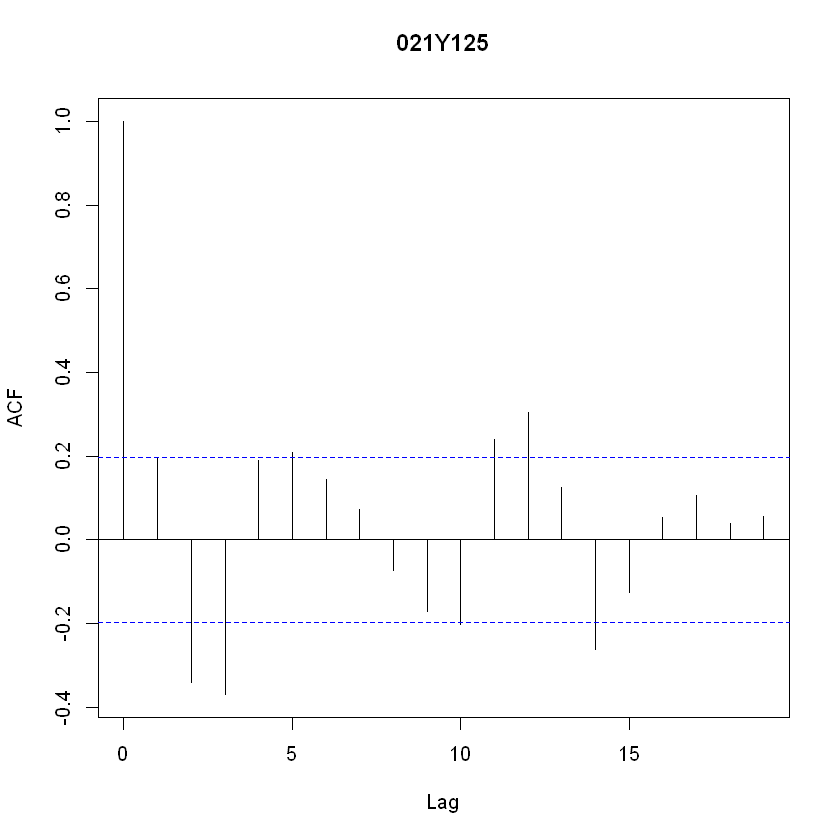


Call:
lm(formula = X008Y002 ~ X021Y125, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-75437 -42237  -9226  50706  96100 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2416702     135679  -17.81   <2e-16 ***
X021Y125       32067       1380   23.23   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 50790 on 98 degrees of freedom
Multiple R-squared:  0.8463,	Adjusted R-squared:  0.8447 
F-statistic: 539.6 on 1 and 98 DF,  p-value: < 2.2e-16


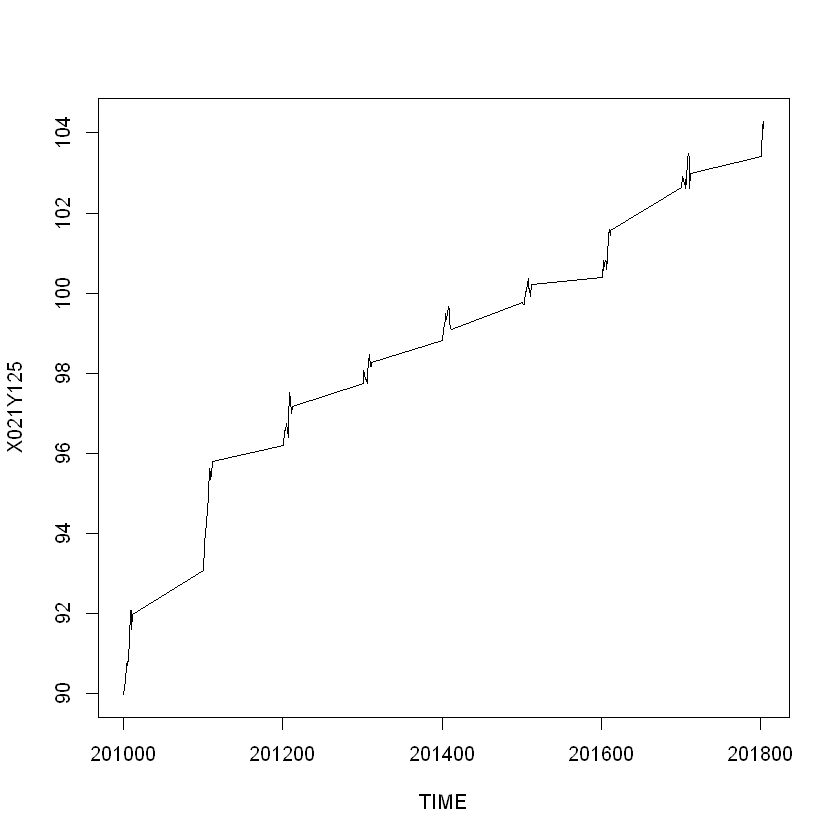

In [13]:
#1차차분
ts.diff1 <- diff(ts,lag=1)

#ACF(autocorrelation) 플롯
acf(as.numeric(ts.diff1[,1]),main=colnames(ts)[1])

#전기대비 증감
ts.rate <-ts.diff1/ts

#dataframe으로 변환
df<-data.frame(ts)

#Plot 그리기
plot(x=rownames(df),y=df[,1],type="l",
     xlab="TIME",ylab=colnames(df)[1])

# #회귀분석
summary(lm(X008Y002~X021Y125, data=df))

In [14]:
#2개이상의 시계열을 만들어 모형 분석
library(zoo)
lst_series <- list("CPIAUCSL","UNRATE","FEDFUNDS") #소비자 물가지수,실업률, 기준금리(FF Rate)
api_key <- "6e866fceb4cbe64a36b95c7953f33c17"
file_type <-"json"

ts<-zoo()
for(i in 1:length(lst_series)){
  url = paste0("http://api.stlouisfed.org/fred/series/observations",
               "?series_id=",lst_series[i],
               "&api_key=",api_key,
               "&file_type=",file_type)
  raw.data <- readLines(url, warn = "F",encoding="UTF-8")
  dat<- fromJSON(raw.data)
  temp<-zoo(as.numeric(dat$observations$value),as.Date(c(dat$observations$date)))
  if(i==1){
    ts<-temp
  }else{
    ts<-na.locf(merge(ts,temp)) 
    colnames(ts)[i]<-lst_series[i]
  }
}
colnames(ts)[1] <- lst_series[1] #첫번째 컬럼이름을 정의

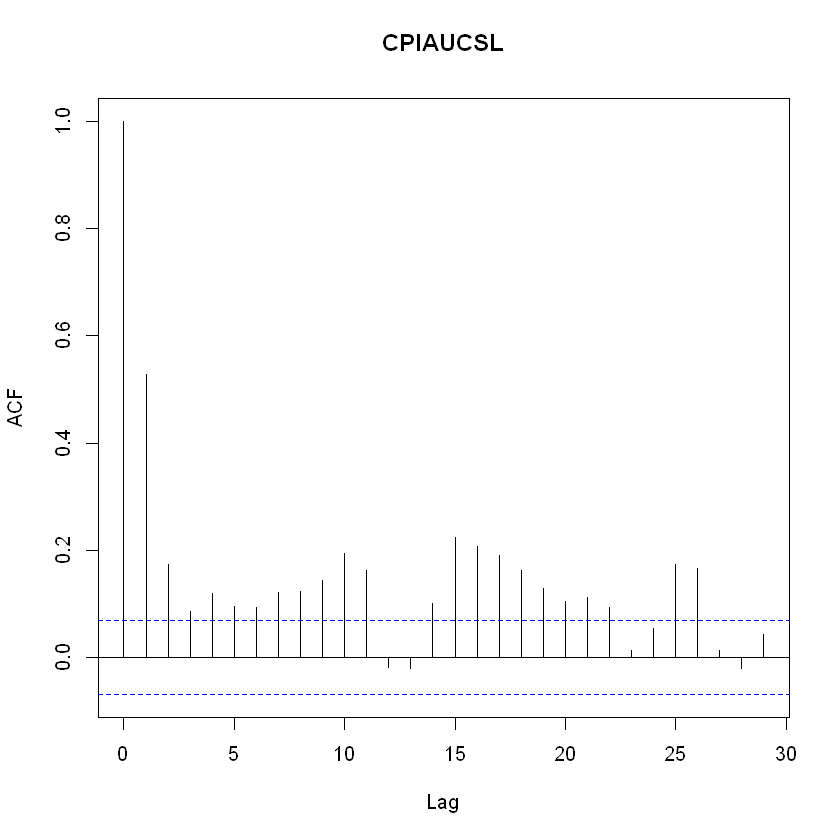


Call:
lm(formula = CPIAUCSL ~ UNRATE + FEDFUNDS, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-140.99  -72.53   16.06   53.45  128.39 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 124.5924     9.6550  12.905  < 2e-16 ***
UNRATE        6.8607     1.5043   4.561  5.9e-06 ***
FEDFUNDS     -9.0638     0.6877 -13.181  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 70.3 on 800 degrees of freedom
Multiple R-squared:  0.1913,	Adjusted R-squared:  0.1893 
F-statistic: 94.61 on 2 and 800 DF,  p-value: < 2.2e-16


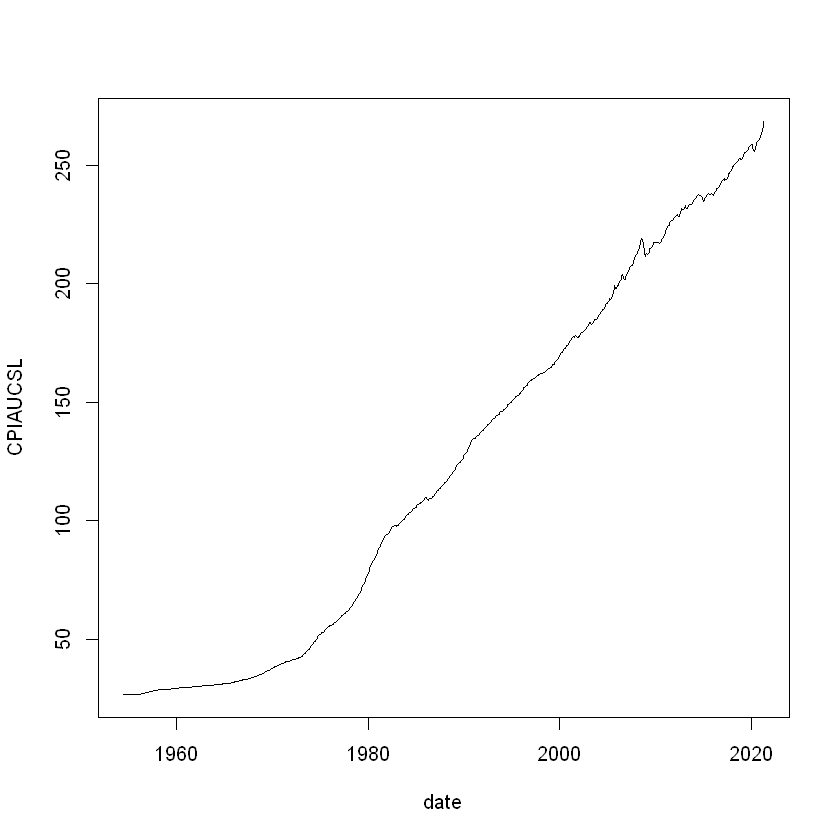

In [15]:
#NA값 제거 
ts<-ts[!is.na(ts[,3]),]

#1차차분
ts.diff1 <- diff(ts,lag=1)

#ACF(autocorrelation) 플롯
acf(as.numeric(ts.diff1[,1]),main=colnames(ts)[1])

#전기대비 증감
ts.rate <-ts.diff1/ts

#dataframe으로 변환
df<-data.frame(ts)

#Plot 그리기
plot(x=as.Date(rownames(df)),y=df[,1],type="l",
     xlab="date",ylab=colnames(df)[1])

#회귀분석
summary(lm(CPIAUCSL~UNRATE+FEDFUNDS, data=df))

In [ ]:
key ='6e866fceb4cbe64a36b95c7953f33c17'
kfred ='6e866fceb4cbe64a36b95c7953f33c17'
kbok = 'JYWDZURGKQQFBLAM4ZMT'